## ECTRIMS Extra experiments

Script to recopilate all of the extra experiments done for the ECTRIMS 2023 presentation and the resubmission to Brain for the COBRA paper.

Extra commentaries on the actual experiments are done in the google docs:
https://docs.google.com/document/d/1UH5hD7MuYL7U54BREREMvf-VRSbJ-kdw1-QcULYpwZA/edit?usp=sharing
(restricted)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statannotations.Annotator import Annotator
import itertools

# ignore warnings for easier plotting
import warnings

warnings.filterwarnings("ignore")

from load_data import load_data, return_asterisks_p

In [10]:
sns.set(style="darkgrid", context="talk", palette="Set1", font="serif")

In [11]:
# Hue colors order and names
# auxiliar dict to put correct order in the figure
map_hue_color = {
    "EDSS_group": ["EDSS<=3", "EDSS>3"],
    "SDMT_group": ["SDMT>=40", "SDMT<40"],
    "G_norm": ["G_z<=0", "G_z>0"],
    "Corr_norm": ["C_z<=0", "C_z>0"],
    "disease": ["HC", "MS"],
    "GROUP": ["HC", "CIS", "RRMS", "SPMS", "PPMS"],
    "CENTER": [
        "CLINIC",
        "MAINZ",
        "MILAN",
        "NAPLES",
        "OSLO",
        "LONDON",
        "AMSTERDAM",
    ],
    "groups": ["HC", "EDSS<=3", "EDSS>3", "SDMT>=40", "SDMT<40"]
    # "GROUP": ["HC", "RRMS", "SPMS", "PPMS"]
}

# get the progressives together.
mapping_prog = {
    "HC": "HC",
    "CIS": "CIS",
    "RRMS": "RRMS",
    "SPMS": "PMS",
    "PPMS": "PMS",
}

df_merged = load_data()
print(df_merged.columns.values)

Initial length: 730
disease
HC    216
MS    514
dtype: int64
QC N: 5
QC Y: 724
LONDON2: 27
['SubjID' 'DOB' 'SEX' 'GROUP' 'ONSET_DATE' 'MR_DATE' 'TREATMENT_AT_MRI'
 'TREATMENT' 'EDSS' 'YED' 'SDMT' 'RAO_SRTS' 'RAO_SRTR' 'RAO_SRTD'
 'RAO_10_36_SRTR' 'RAO_10_36_SRTD' 'RAO_WLG' 'RAO_PASAT' 'CENTER'
 'FMRI_TR' 'FMRI_NSCANS' 'FMRI_SCANTIME' 'AGE' 'DD' 'BICAMS_CVLT2'
 'BICAMS_BVMTR' 'NPS_x' '9HPT_dH' '9HPT_ndH' 'T25FW' 'motor_x'
 'Datecognitiveevaluation' 'TypeRAO' 'RAO_PASAT2sec'
 'RAO_WLGperseveration' 'RAO_WLGintrusion' 'Right9HPT' 'Left9HPT'
 'MFIS_TOTAL' 'MFIS_PHYS_FUNCT' 'MFIS_COGN_FUNCT' 'MFIS_SOCIAL_FUNCT'
 'BDI_II' '9HPT_average' 'notes_NPS' '9HPT_dH_' 'DWI_PROT' 'SCANNER'
 'SRTL_sum' 'PASAT2' 'WRDLG' 'QC' 'CENTER2' 'GM' 'GMF' 'WM' 'WMF' 'CSF'
 'CSFF' 'LV' 'LVF' 'BPF' 'RDwm_mean' 'RDwm_std' 'RDlwm_mean' 'RDlwm_std'
 'RDl_mean' 'RDl_std' 'RD_gm' 'RD_gmwm' 'Meta_x' 'Meta_noreg'
 'Unnamed: 21' 'Unnamed: 22' 'Unnamed: 23' 'FAwm_mean' 'FAwm_std'
 'FAlwm_mean' 'FAlwm_std' 'FAl_mean' 'FAl_st

Log 10 gray matter volume vs white matter volume
Draw R and formula on top


[0.98927392]
[-0.08433515]


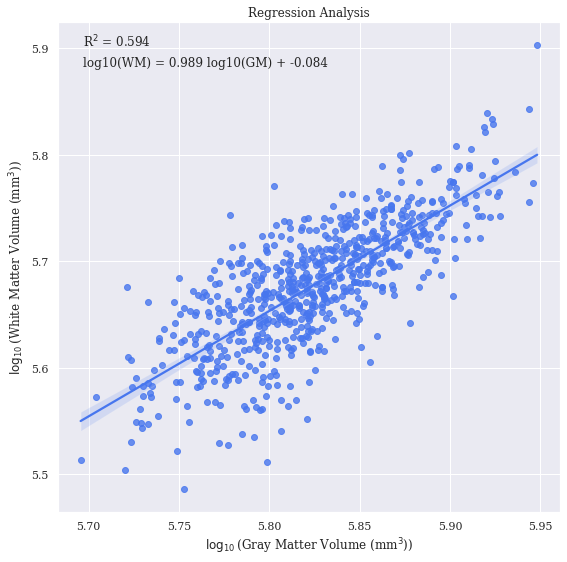

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set(style="darkgrid", context="notebook", palette="turbo", font="serif")

# Calculate log-transformed values
df_merged["GMlog"] = np.log10(df_merged["GM"])
df_merged["WMlog"] = np.log10(df_merged["WM"])

# Step 1: Calculate the linear regression model
X = df_merged[["GMlog"]]
y = df_merged[["WMlog"]]

linear_model = LinearRegression()
linear_model.fit(X, y)

# Step 2: Compute R^2 value
y_pred = linear_model.predict(X)
r2 = r2_score(y, y_pred)

# compute corresponding r2 values for each disease
r2_values = {}

# for disease in df_merged["disease"].unique():
#     df_disease = df_merged[df_merged["disease"] == disease]
#     X = df_disease[["GMlog"]]
#     y = df_disease[["WMlog"]]

#     linear_model = LinearRegression()
#     linear_model.fit(X, y)

#     # Step 2: Compute R^2 value
#     y_pred = linear_model.predict(X)
#     r2 = r2_score(y, y_pred)
#     r2_values[disease] = r2


# Step 3: Plot scatter points and regression line
plt.figure(figsize=(9, 9))
sns.regplot(
    x="GMlog",
    y="WMlog",
    data=df_merged,
    scatter_kws={"alpha": 0.8},
)
#
# sns.lmplot(
#     x="GMlog",
#     y="WMlog",
#     hue="disease",
#     data=df_merged,
#     hue_order=["HC", "MS"],
#     scatter_kws={"alpha": 0.8},
#     markers=["o", "x"],
#     palette="deep",
# )

# Step 4: Add axis labels, title and annotations
plt.xlabel("$\\log_{10}$(Gray Matter Volume (mm$^3$))")
plt.ylabel("$\\log_{10}$(White Matter Volume (mm$^3$))")
plt.title("Regression Analysis")
plt.annotate(
    f"R$^2$ = {r2:.3f}",
    xy=(0.05, 0.95),
    xycoords="axes fraction",
)
# plt.annotate(
#     f"HC: R$^2$ = {r2_values['HC']:.3f}",
#     xy=(0.05, 0.90),
#     xycoords="axes fraction",
# )
print(linear_model.coef_[0])
print(linear_model.intercept_)
plt.annotate(
    f"log10(WM) = {linear_model.coef_[0][0]:.3f} log10(GM) + {linear_model.intercept_[0]:.3f}",
    xy=(0.05, 0.91),
    xycoords="axes fraction",
)

plt.show()

Comm_ratio
CC_Sag_area_sqrt
HC
0.32010382663749587
2.436240136935744e-06
Comm_ratio
CC_Sag_area_sqrt
MS
0.3439884462142446
4.980643350234826e-15
Comm_ratio
CC_ratio_area
HC
0.36299250359298746
7.103615628267905e-08
Comm_ratio
CC_ratio_area
MS
0.3369065320440169
1.9178698287594674e-14
Comm_ratio
Full_CC_ICV
HC
0.4002292315534449
2.102962116450937e-09
Comm_ratio
Full_CC_ICV
MS
0.4347933845529771
5.70968623571684e-24


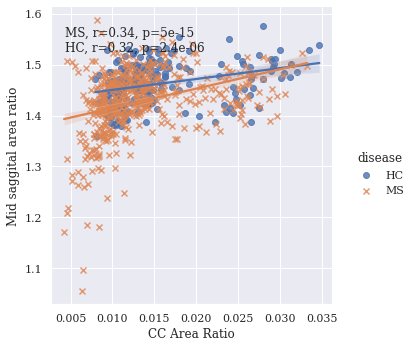

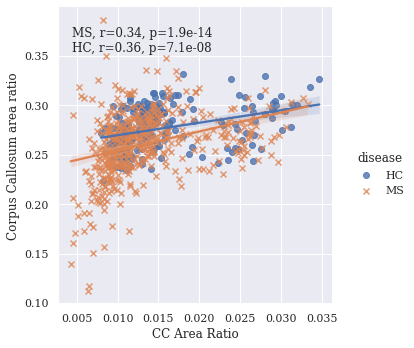

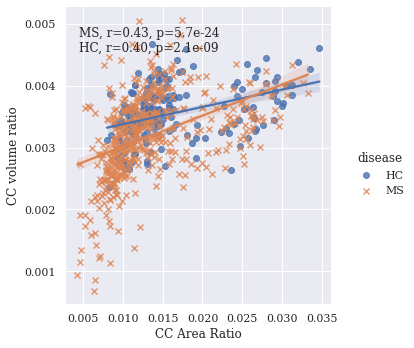

In [13]:
# CC vs others
# separated by HC and pwMS without correction


def annotate(col1, col2, data, multihue=False, **kwargs):
    if len(data[col1]) >= 2 or len(data[col2]) >= 2:
        print(col1)
        print(col2)
        print(kwargs["label"])
        r, p = stats.pearsonr(data[col1], data[col2])
        print(r)
        print(p)
        ax = plt.gca()

        # hardcoded, udpate if working with other labels
        x_pos = 0.05
        if multihue:
            label = kwargs["label"]
            dict_of_labels = {"CIS": 0, "RRMS": 1, "PMS": 2, "MS": 0, "HC": 1}
            y_pos = 0.9 - dict_of_labels[kwargs["label"]] * 0.05
        else:
            label = " "
            y_pos = 0.9

        ax.text(
            x_pos,
            y_pos,
            f"{label}, " + "r={:.2f}, p={:.2g}".format(r, p),
            transform=ax.transAxes,
        )


# Inter vs Inter

# fer un subplot 2x1.
# i fer que cada un siguin les figures.
sns.set(style="darkgrid", context="notebook", palette="turbo", font="serif")

x1 = "Comm_ratio"
x2 = "CC_Sag_area_sqrt"

y1 = "Comm_ratio"
y2 = "CC_ratio_area"

z1 = "Comm_ratio"

df_merged["Full_CC_ICV"] = df_merged["Full_CC"] / df_merged["BrainSegVol"]

z2 = "Full_CC_ICV"

for a, b, btitle in [
    (x1, x2, "Mid saggital area ratio"),
    (y1, y2, "Corpus Callosum area ratio"),
    (z1, z2, "CC volume ratio"),
]:
    # create square large figure

    g = sns.lmplot(
        data=df_merged,
        x=a,
        y=b,
        hue="disease",
        hue_order=["HC", "MS"],
        scatter_kws={"alpha": 0.8},
        markers=["o", "x"],
        palette="deep",
    )
    g.map_dataframe(annotate, a, b, multihue=True)
    # Set labels using plt
    plt.xlabel("CC Area Ratio")
    plt.ylabel(btitle)

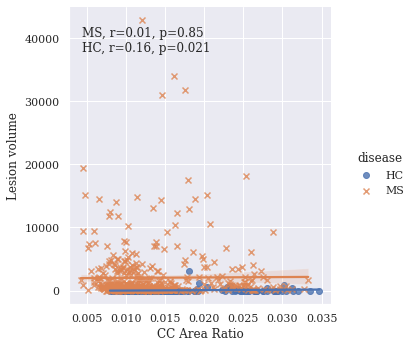

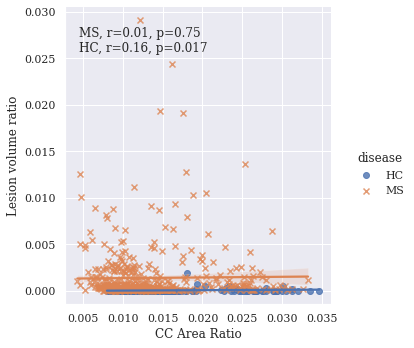

In [14]:
# CC vs others
# separated by HC and pwMS without correction


def annotate(col1, col2, data, multihue=False, **kwargs):
    if len(data[col1]) >= 2 or len(data[col2]) >= 2:
        r, p = stats.pearsonr(data[col1], data[col2])
        ax = plt.gca()

        # hardcoded, udpate if working with other labels
        x_pos = 0.05
        if multihue:
            label = kwargs["label"]
            dict_of_labels = {"CIS": 0, "RRMS": 1, "PMS": 2, "MS": 0, "HC": 1}
            y_pos = 0.9 - dict_of_labels[kwargs["label"]] * 0.05
        else:
            label = " "
            y_pos = 0.9

        ax.text(
            x_pos,
            y_pos,
            f"{label}, " + "r={:.2f}, p={:.2g}".format(r, p),
            transform=ax.transAxes,
        )


# Inter vs Inter

# fer un subplot 2x1.
# i fer que cada un siguin les figures.
sns.set(style="darkgrid", context="notebook", palette="turbo", font="serif")

x1 = "Comm_ratio"
x2 = "LV"

y1 = "Comm_ratio"
y2 = "LVF"

for a, b, btitle in [
    (x1, x2, "Lesion volume"),
    (y1, y2, "Lesion volume ratio"),
]:
    # create square large figure

    g = sns.lmplot(
        data=df_merged,
        x=a,
        y=b,
        hue="disease",
        hue_order=["HC", "MS"],
        scatter_kws={"alpha": 0.8},
        markers=["o", "x"],
        palette="deep",
    )
    g.map_dataframe(annotate, a, b, multihue=True)
    # Set labels using plt
    plt.xlabel("CC Area Ratio")
    plt.ylabel(btitle)

In [15]:
df_merged["q_Comm_spl"] = df_merged["Comm_ratio"] / df_merged["SC_spl_full"]
df_merged["q_Comm_eff"] = df_merged["Comm_ratio"] / df_merged["SC_eff_full"]
df_merged["q_CC_spl"] = df_merged["CC_ratio_area"] / df_merged["SC_spl_full"]
df_merged["q_CC_eff"] = df_merged["CC_ratio_area"] / df_merged["SC_eff_full"]

In [17]:
## 4.2 Direct partial correlations between selected biomarkers and G/cs
## Here it is part of what we want to do with 5.2 without correction, so no need
def partial_corr(df, dependent_vars, correct_for="AGE + C(SEX)", cs=False):
    """
    Do I generate the figures or only the tables?
    Generate the table and small number of figures (maybe only for one or two biomarkers)
    """
    structural_dmg_vars = ["EDSS", "SDMT"]

    # structural_dmg_vars = ["GMF", "WMF", "LVF", "BPF", "EDSS"]

    df_results_glm = pd.DataFrame()

    for biomarker in structural_dmg_vars:
        results_to_save = {}
        for xvar in dependent_vars:
            df_figure = df.dropna(subset=[biomarker, xvar])

            results = smf.ols(
                f"{biomarker} ~ {correct_for}", data=df_figure
            ).fit()
            df_figure[f"{biomarker}_C"] = results.resid

            results = smf.ols(f"{xvar} ~  {correct_for}", data=df_figure).fit()
            df_figure[f"{xvar}_C"] = results.resid

            r, p = stats.pearsonr(
                df_figure[f"{biomarker}_C"], df_figure[f"{xvar}_C"]
            )
            ast = return_asterisks_p(p)
            # str_save = f"r={r:.2f}{ast}"
            str_save = f"r={r:.2f}, p={p:.1e}{ast}"
            results_to_save[xvar] = str_save

        dict_to_append = {x: results_to_save[x] for x in dependent_vars}
        dict_to_append = {"Biomarker": biomarker, **dict_to_append}
        df_results_glm = df_results_glm.append(
            dict_to_append, ignore_index=True
        )

    # remove index from df
    df_results_glm = df_results_glm.reset_index(drop=True)
    df_results_glm = df_results_glm.set_index("Biomarker")
    # df_results_glm = df_results_glm.style.set_caption(f'{title}: partial correlations')
    # display(df_results_glm)
    return df_results_glm.T

"""
df_results = partial_corr(
    df_merged,
    [
        "Comm_ratio",
        "SC_spl_full",
        "SC_eff_full",
        "CC_ratio_area",
        "FC_spl_full",
        "FC_eff_full",
    ],
    False,
)
df_results_q = partial_corr(
    df_merged, ["q_Comm_spl", "q_Comm_eff", "q_CC_spl", "q_CC_eff"], False
)
"""

'\ndf_results = partial_corr(\n    df_merged,\n    [\n        "Comm_ratio",\n        "SC_spl_full",\n        "SC_eff_full",\n        "CC_ratio_area",\n        "FC_spl_full",\n        "FC_eff_full",\n    ],\n    False,\n)\ndf_results_q = partial_corr(\n    df_merged, ["q_Comm_spl", "q_Comm_eff", "q_CC_spl", "q_CC_eff"], False\n)\n'

In [18]:
## Create LaTeX tables

# rename columns
rename_dict_index = {
    "Comm_ratio": "Commisural ratio",
    "SC_spl_full": "Mean shortest path length",
    "SC_eff_full": "Mean efficiency",
    "CC_ratio_area": "Corpus callosum area ratio",
}
df_results.rename(index=rename_dict_index, inplace=True)

# reorder index of the df_results in the order: Commisural ratio, Corpus callosum area ratio, Mean shortest path length, Mean efficiency
df_results = df_results.reindex(
    [
        "Commisural ratio",
        "Corpus callosum area ratio",
        "Mean shortest path length",
        "Mean efficiency",
        "FC_spl_full",
        "FC_eff_full",
    ]
)

# print latex
print(df_results.to_latex(escape=False))

NameError: name 'df_results' is not defined

In [ ]:
## Create LaTeX tables

# rename columns
rename_dict_index = {
    "q_Comm_spl": "Commisural ratio / SPL",
    "q_Comm_eff": "Commisural ratio / Eff.",
    "q_CC_spl": "CC area ratio / SPL",
    "q_CC_eff": "CC area ratio / Eff.",
}
df_results_q.rename(index=rename_dict_index, inplace=True)

# reorder index of the df_results in the order: Commisural ratio, Corpus callosum area ratio, Mean shortest path length, Mean efficiency
df_results_q = df_results_q.reindex(
    [
        "Commisural ratio / SPL",
        "Commisural ratio / Eff.",
        "CC area ratio / SPL",
        "CC area ratio / Eff.",
    ]
)

# print latex
print(df_results_q.to_latex(escape=False))

\begin{tabular}{lll}
\toprule
Biomarker &                   EDSS &                  SDMT \\
\midrule
Commisural ratio / SPL  &   r=-0.13, p=2.9e-03** &  r=0.17, p=6.3e-05*** \\
Commisural ratio / Eff. &     r=-0.08, p=6.6e-02 &   r=0.11, p=7.4e-03** \\
CC area ratio / SPL     &    r=-0.11, p=1.2e-02* &   r=0.13, p=2.8e-03** \\
CC area ratio / Eff.    &  r=-0.18, p=4.1e-05*** &  r=0.17, p=6.2e-05*** \\
\bottomrule
\end{tabular}



In [ ]:
# Study the YED column
df_merged["YED"].unique()

# Remove all the rows with missing values in YED
df_merged_yed = df_merged.dropna(subset=["YED"])
df_merged_yed = df_merged_yed[df_merged_yed["YED"] != " "]

# Remove all non numerical values
df_merged_yed = df_merged_yed[
    df_merged_yed["YED"].apply(lambda x: x.isnumeric())
]

# Convert to int
df_merged_yed["YED"] = df_merged_yed["YED"].astype(int)

# How many people we have left in each group? divide by diagnostic and group
df_merged_yed.groupby(["disease", "GROUP"])["YED"].count()

# Remove subjects without SDMT
df_merged_yed = df_merged_yed.dropna(subset=["SDMT"])

print(len(df_merged_yed))

# Print it in a readable way
print(
    df_merged_yed.groupby(["disease", "CENTER"])["YED"]
    .count()
    .to_latex(escape=False)
)

451
\begin{tabular}{llr}
\toprule
   &      &  YED \\
disease & CENTER &      \\
\midrule
HC & AMSTERDAM &   48 \\
   & MILAN &   29 \\
MS & AMSTERDAM &  172 \\
   & LONDON &   37 \\
   & MILAN &   56 \\
   & NAPLES &   51 \\
   & OSLO &   58 \\
\bottomrule
\end{tabular}



In [ ]:
df_results = partial_corr(
    df_merged_yed,
    [
        "Comm_ratio",
        "SC_spl_full",
        "SC_eff_full",
        "CC_ratio_area",
        "FC_spl_full",
        "FC_eff_full",
    ],
    "AGE + C(SEX) + YED",
    False,
)
df_results_q = partial_corr(
    df_merged_yed,
    ["q_Comm_spl", "q_Comm_eff", "q_CC_spl", "q_CC_eff"],
    "AGE + C(SEX) + YED",
    False,
)

In [ ]:
## Create LaTeX tables

# rename columns
rename_dict_index = {
    "Comm_ratio": "Commisural ratio",
    "SC_spl_full": "Mean shortest path length",
    "SC_eff_full": "Mean efficiency",
    "CC_ratio_area": "Corpus callosum area ratio",
}
df_results.rename(index=rename_dict_index, inplace=True)

# reorder index of the df_results in the order: Commisural ratio, Corpus callosum area ratio, Mean shortest path length, Mean efficiency
df_results = df_results.reindex(
    [
        "Commisural ratio",
        "Corpus callosum area ratio",
        "Mean shortest path length",
        "Mean efficiency",
        "FC_spl_full",
        "FC_eff_full",
    ]
)

# print latex
print(df_results.to_latex(escape=False))

\begin{tabular}{lll}
\toprule
Biomarker &                  EDSS &                   SDMT \\
\midrule
Commisural ratio           &    r=-0.05, p=3.0e-01 &   r=0.17, p=2.9e-04*** \\
Corpus callosum area ratio &  r=-0.16, p=2.2e-03** &   r=0.36, p=5.7e-15*** \\
Mean shortest path length  &     r=0.04, p=4.2e-01 &     r=0.10, p=3.6e-02* \\
Mean efficiency            &     r=0.06, p=2.1e-01 &  r=-0.17, p=3.1e-04*** \\
FC_spl_full                &     r=0.05, p=3.4e-01 &     r=-0.02, p=6.8e-01 \\
FC_eff_full                &    r=-0.05, p=2.9e-01 &      r=0.03, p=5.2e-01 \\
\bottomrule
\end{tabular}



In [ ]:
## Create LaTeX tables

# rename columns
rename_dict_index = {
    "q_Comm_spl": "Commisural ratio / SPL",
    "q_Comm_eff": "Commisural ratio / Eff.",
    "q_CC_spl": "CC area ratio / SPL",
    "q_CC_eff": "CC area ratio / Eff.",
}
df_results_q.rename(index=rename_dict_index, inplace=True)

# reorder index of the df_results in the order: Commisural ratio, Corpus callosum area ratio, Mean shortest path length, Mean efficiency
df_results_q = df_results_q.reindex(
    [
        "Commisural ratio / SPL",
        "Commisural ratio / Eff.",
        "CC area ratio / SPL",
        "CC area ratio / Eff.",
    ]
)

# print latex
print(df_results_q.to_latex(escape=False))

\begin{tabular}{lll}
\toprule
Biomarker &                 EDSS &                  SDMT \\
\midrule
Commisural ratio / SPL  &  r=-0.12, p=2.6e-02* &  r=0.20, p=2.4e-05*** \\
Commisural ratio / Eff. &   r=-0.02, p=7.6e-01 &   r=0.13, p=4.1e-03** \\
CC area ratio / SPL     &  r=-0.13, p=1.1e-02* &  r=0.17, p=2.3e-04*** \\
CC area ratio / Eff.    &   r=-0.06, p=2.1e-01 &  r=0.25, p=9.1e-08*** \\
\bottomrule
\end{tabular}



## CC VOLUME VS INTRA MEASURES

Do the same good old figure but with the CC volume instead of the CC area


In [20]:
def annotate_axis(col1, col2, data, ax, label, level=0):
    """
    Version of the annotator function but
    for

    """
    r, p = stats.pearsonr(data[col1], data[col2])

    # hardcoded, udpate if working with other labels
    x_pos = 0.05
    y_pos = 0.9 - level * 0.05

    ax.text(
        x_pos,
        y_pos,
        f"{label}, " + "r={:.2f}, p={:.2g}".format(r, p),
        transform=ax.transAxes,
    )


from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("viridis"))


def create_subplot(x, y, ax, df, title, xlabel, ylabel, legend=True):
    ## Comm ratio - SPL
    # HC
    df_merged_hc = df_merged[df.disease == "HC"]
    sns.regplot(
        x=x,
        y=y,
        data=df_merged_hc,
        scatter_kws={"alpha": 0.8},
        marker="x",
        color="darkorange",
        ax=ax,
    )

    # pwMS
    df_merged_pwms = df_merged[df.disease != "HC"]

    EDSS_norm = (df_merged_pwms.EDSS - df_merged_pwms.EDSS.min()) / (
        df_merged_pwms.EDSS.max() - df_merged_pwms.EDSS.min()
    )
    df_merged_pwms_EDSS = [cmap(x) for x in EDSS_norm]
    color_array = np.array([*df_merged_pwms_EDSS])

    sns.regplot(
        x=x,
        y=y,
        data=df_merged_pwms,
        scatter_kws={"color": color_array, "alpha": 0.6},
        marker="o",
        ax=ax,
    )

    # annotate
    annotate_axis(x, y, df_merged_hc, ax, "HC", 0)
    annotate_axis(x, y, df_merged_pwms, ax, "pwMS", 1)

    # Title and axis
    # ax.set_title("Comm. ratio - SPL")
    # ax.set_xlabel("Commissural ratio")
    # ax.set_ylabel("Average SPL")
    from matplotlib.lines import Line2D

    handles = [
        Line2D(
            [0],
            [0],
            markerfacecolor="darkorange",
            color="darkorange",
            marker="x",
            lw=0,
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            markerfacecolor="darkblue",
            lw=0,
            color="w",
            markersize=15,
        ),
    ]
    if legend:
        ax.legend(
            handles=handles,
            labels=["HC", "pwMS"],
            bbox_to_anchor=(1.04, 1),
            loc="upper left",
        )


df_merged = load_data()


x1 = "Full_CC"
x2 = "Full_CC_ICV"

y1 = "SC_spl_full"
y2 = "SC_eff_full"

to_correct = "AGE + C(SEX)"
df_merged["Full_CC_ICV"] = df_merged["Full_CC"] / df_merged["BrainSegVol"]


df_healthy = df_merged[df_merged.disease == "HC"]
df_disease = df_merged[df_merged.disease != "HC"]

# For healthy, create a model between x1 and y1, same for disease, with age and sex as covariates

results_hc = smf.ols(f"{x1} ~ {y2} + {to_correct}", data=df_healthy).fit()
results_ms = smf.ols(f"{x1} ~ {y2} + {to_correct}", data=df_disease).fit()

# print summary
print(results_hc.summary())
print(results_ms.summary())



results = smf.ols(f"{x1} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{x1}"] = results.resid + results.params.Intercept

results = smf.ols(f"{y1} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{y1}"] = results.resid + results.params.Intercept

results = smf.ols(f"{y2} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{y2}"] = results.resid + results.params.Intercept

results = smf.ols(f"{y2} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{y2}"] = results.resid + results.params.Intercept




Initial length: 730
disease
HC    216
MS    514
dtype: int64
QC N: 5
QC Y: 724
LONDON2: 27
                            OLS Regression Results                            
Dep. Variable:                Full_CC   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     22.94
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           7.76e-13
Time:                        11:21:29   Log-Likelihood:                -1605.5
No. Observations:                 208   AIC:                             3219.
Df Residuals:                     204   BIC:                             3232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:


## Second version
# Don't use lmplot, its shite
# use subplot, and for each axis plot the things separately
sns.set(style="darkgrid", context="talk", palette="turbo", font="serif")
f, axes = plt.subplots(2, 2, figsize=(15, 15), constrained_layout=True)
axes = axes.ravel()

## Comm ratio - Average SPL
create_subplot(
    x1,
    y1,
    axes[0],
    df_merged,
    "CC volume - SPL",
    "CC volume",
    "Average SPL",
    False,
)

## Comm ratio - Efficiency
create_subplot(
    x1,
    y2,
    axes[1],
    df_merged,
    "CC volume - Efficiency",
    "CC volume",
    "Efficiency",
)

## Comm ratio - Average SPL
create_subplot(
    x2,
    y1,
    axes[2],
    df_merged,
    "CC volume fraction - SPL",
    "CC volume fraction",
    "Average SPL",
    False,
)

## Comm ratio - Efficiency
create_subplot(
    x2,
    y2,
    axes[3],
    df_merged,
    "CC volume fraction - Efficiency",
    "CC volume fraction",
    "Efficiency",
    False,
)

## set the appropiate axis names
axes[0].set_xlabel("CC volume")
axes[0].set_ylabel("Average SPL")

axes[1].set_xlabel("CC volume")
axes[1].set_ylabel("Efficiency")

axes[2].set_xlabel("CC volume fraction")
axes[2].set_ylabel("Average SPL")

axes[3].set_xlabel("CC volume fraction")
axes[3].set_ylabel("Efficiency")


## LEGENDS
# Need to one one for colors and one for markers
# the one for colors needs to be a colorbar
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.93, 0.14, 0.02, 0.65])

# and the other one just a classic legend
import matplotlib as mpl

plt.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(
            vmin=df_merged.EDSS.min(), vmax=df_merged.EDSS.max()
        ),
        cmap=cmap,
    ),
    cax=cbar_ax,
    orientation="vertical",
    label="EDSS",
)